In [68]:
%set_env SHELL=/bin/bash
%set_env OMP_NUM_THREADS=8

env: SHELL=/bin/bash
env: OMP_NUM_THREADS=8


In [69]:
import mbuild
import foyer
import unyt as u
import mosdef_cassandra as mc
import matplotlib.pyplot as plt
%matplotlib inline

# Create a methane UA molecule (Effectively a LJ Particle)
methane = mbuild.Compound(name="_CH4")

# How many Molecules I am Initiallizing my System With
Nmolecules = 256

# Length of the Cubic Box (nm)
LBox = 3.0

# Load the forcefield via foyer
ff = foyer.forcefields.load_TRAPPE_UA()

# Apply the forcefield parameters to methane with foyer
methane_ff = ff.apply(methane)

# Define an empty simulation box (in nm)
box = mbuild.Box([LBox, LBox, LBox])

# Define the boxes, species in the system, molecules in the box
ensemble = 'nvt'
box_list = [box]
species_list = [methane_ff]
molecules_to_add = [[Nmolecules]]

# Create the System
system = mc.System(box_list, species_list, mols_to_add=molecules_to_add)

# Create the MoveSet
moveset = mc.MoveSet(ensemble, species_list)

# Run a Monte Carlo simulation!
custom_args = {
    "units": "sweeps",
    "steps_per_sweep": Nmolecules,
    "vdw_cutoff":14.0 * u.Angstrom,
    "charge_style": "none",
    "charge_cutoff":14.0 * u.Angstrom,
    "prop_freq": 100,
    "coord_freq": 100,
    "run_name": "equil",
}

mc.run(
    system=system,
    moveset=moveset,
    run_type="equilibration",
    run_length=5000,
    temperature=100.0 * u.K,
    **custom_args
)

print("MC Simulation Finished")

/home/woodrowwilson/Programs/miniconda3/lib/python3.9/site-packages/mbuild/conversion.py:1747: UserWarning: No element attribute associated with '<_CH4 pos=([0. 0. 0.]), 0 bonds, id: 140442153558224>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)
/home/woodrowwilson/Programs/miniconda3/lib/python3.9/site-packages/parmed/openmm/topsystem.py:240: OpenMMWarning: Adding what seems to be Urey-Bradley terms before Angles. This is unexpected, but the parameters will all be present in one form or another.
  warnings.warn('Adding what seems to be Urey-Bradley terms before ' # pragma: no cover
/home/woodrowwilson/Programs/miniconda3/lib/python3.9/site-packages/mbuild/formats/cassandramcf.py:219: UserWarning: No bonds found. Cassandra will interpet this as a rigid species
  warnings.warn(


Using the following executables for Cassandra:
Python: /home/woodrowwilson/Programs/miniconda3/bin/python
library_setup: /home/woodrowwilson/Programs/cassandra/1.2.6/Exe/library_setup.py
Cassandra: /home/woodrowwilson/Programs/cassandra/1.2.6/Exe/cassandra.exe
Generating fragment libraries...
Running Cassandra...
MC Simulation Finished


In [70]:
!ls -lhtr

total 1.4M
-rw-r--r-- 1 woodrowwilson woodrowwilson 128K Jul 12 23:20 My-First-MC-Simulation.ipynb
-rw-rw-r-- 1 woodrowwilson woodrowwilson  200 Jul 12 23:21 species1.pdb
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.3K Jul 12 23:21 species1.mcf
drwxrwxr-x 4 woodrowwilson woodrowwilson 4.0K Jul 12 23:21 species1
-rw-rw-r-- 1 woodrowwilson woodrowwilson 2.3K Jul 12 23:21 equil.inp
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.1M Jul 12 23:21 equil.out.xyz
-rw-rw-r-- 1 woodrowwilson woodrowwilson  26K Jul 12 23:21 equil.out.chk
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.1K Jul 12 23:21 mosdef_cassandra_2022-07-12_23:21:36.756216.log
-rw-rw-r-- 1 woodrowwilson woodrowwilson 8.3K Jul 12 23:21 equil.out.prp
-rw-rw-r-- 1 woodrowwilson woodrowwilson  88K Jul 12 23:21 equil.out.log
-rw-rw-r-- 1 woodrowwilson woodrowwilson  16K Jul 12 23:21 equil.out.H


In [71]:
import pandas as pd

def read_cassandra_prp(filename):
    with open(filename) as fh:
        #First line
        fh.readline()
        #Secondline
        column_names = fh.readline().split()
        del column_names[0]
    
    return pd.read_table(filename, skiprows=3, names=column_names, delim_whitespace=True)

df = read_cassandra_prp("equil.out.prp")
df

,MC_SWEEP,Energy_Total,Energy_Intra,Energy_Inter,Enthalpy,Pressure,Volume,Nmols,Mass_Density
0,0,-482.72783,0.0,-482.72783,1897.7868,1464.051700,27000.0,256.0,252.58708
1,100,-1156.85190,0.0,-1156.85190,-1673.7355,-317.891070,27000.0,256.0,252.58708
2,200,-1218.43260,0.0,-1218.43260,-1616.5829,-244.868320,27000.0,256.0,252.58708
3,300,-1210.01060,0.0,-1210.01060,-1533.7370,-199.096530,27000.0,256.0,252.58708
4,400,-1263.06420,0.0,-1263.06420,-1658.6208,-243.273160,27000.0,256.0,252.58708
5,500,-1272.73540,0.0,-1272.73540,-1667.6131,-242.855630,27000.0,256.0,252.58708
6,600,-1236.27870,0.0,-1236.27870,-1497.7623,-160.816300,27000.0,256.0,252.58708
7,700,-1274.01370,0.0,-1274.01370,-1543.1770,-165.539460,27000.0,256.0,252.58708
8,800,-1336.66730,0.0,-1336.66730,-1698.0254,-222.240580,27000.0,256.0,252.58708
9,900,-1348.78050,0.0,-1348.78050,-1648.7512,-184.486460,27000.0,256.0,252.58708


<AxesSubplot:xlabel='MC_SWEEP'>

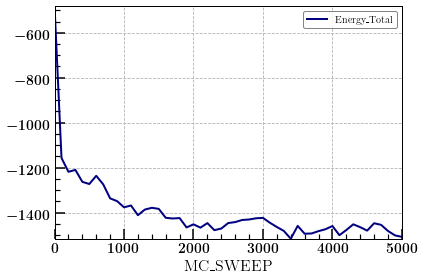

In [72]:
df.plot(x="MC_SWEEP", y="Energy_Total")

In [73]:
#Switch from Equilibration to Production by Restarting
mc.restart(
    restart_from="equil",
    run_name="prod",
    run_type="production",
    total_run_length=10000,
)

print("MC Simulation Finished")

Using the following executables for Cassandra:
Python: /home/woodrowwilson/Programs/miniconda3/bin/python
library_setup: /home/woodrowwilson/Programs/cassandra/1.2.6/Exe/library_setup.py
Cassandra: /home/woodrowwilson/Programs/cassandra/1.2.6/Exe/cassandra.exe
Running Cassandra...
MC Simulation Finished


In [74]:
!ls -lhtr

total 2.6M
-rw-r--r-- 1 woodrowwilson woodrowwilson 128K Jul 12 23:20 My-First-MC-Simulation.ipynb
-rw-rw-r-- 1 woodrowwilson woodrowwilson  200 Jul 12 23:21 species1.pdb
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.3K Jul 12 23:21 species1.mcf
drwxrwxr-x 4 woodrowwilson woodrowwilson 4.0K Jul 12 23:21 species1
-rw-rw-r-- 1 woodrowwilson woodrowwilson 2.3K Jul 12 23:21 equil.inp
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.1M Jul 12 23:21 equil.out.xyz
-rw-rw-r-- 1 woodrowwilson woodrowwilson  26K Jul 12 23:21 equil.out.chk
-rw-rw-r-- 1 woodrowwilson woodrowwilson 1.1K Jul 12 23:21 mosdef_cassandra_2022-07-12_23:21:36.756216.log
-rw-rw-r-- 1 woodrowwilson woodrowwilson 8.3K Jul 12 23:21 equil.out.prp
-rw-rw-r-- 1 woodrowwilson woodrowwilson  88K Jul 12 23:21 equil.out.log
-rw-rw-r-- 1 woodrowwilson woodrowwilson  16K Jul 12 23:21 equil.out.H
-rw-rw-r-- 1 woodrowwilson woodrowwilson 2.3K Jul 12 23:21 prod.inp
-rw-rw-r-- 1 woodrowwilson woodrowwilson 8.2K Jul 12 23:22 prod.out.prp
-rw-rw-r--

In [75]:
df_pd = read_cassandra_prp("prod.out.prp")
df_pd

,MC_SWEEP,Energy_Total,Energy_Intra,Energy_Inter,Enthalpy,Pressure,Volume,Nmols,Mass_Density
0,5100,-1514.1604,0.0,-1514.1604,-1666.8360,-93.897712,27000.0,256.0,252.58708
1,5200,-1481.7659,0.0,-1481.7659,-1605.8121,-76.290282,27000.0,256.0,252.58708
2,5300,-1454.4021,0.0,-1454.4021,-1880.7390,-262.203490,27000.0,256.0,252.58708
3,5400,-1458.7467,0.0,-1458.7467,-1856.4205,-244.575270,27000.0,256.0,252.58708
4,5500,-1438.7637,0.0,-1438.7637,-1640.6749,-124.178420,27000.0,256.0,252.58708
5,5600,-1495.7930,0.0,-1495.7930,-1895.4367,-245.786800,27000.0,256.0,252.58708
6,5700,-1465.9071,0.0,-1465.9071,-1628.3119,-99.881350,27000.0,256.0,252.58708
7,5800,-1469.8177,0.0,-1469.8177,-1726.9928,-158.166480,27000.0,256.0,252.58708
8,5900,-1472.7534,0.0,-1472.7534,-1535.4944,-38.586678,27000.0,256.0,252.58708
9,6000,-1447.4133,0.0,-1447.4133,-1614.9315,-103.026210,27000.0,256.0,252.58708


<AxesSubplot:xlabel='MC_SWEEP'>

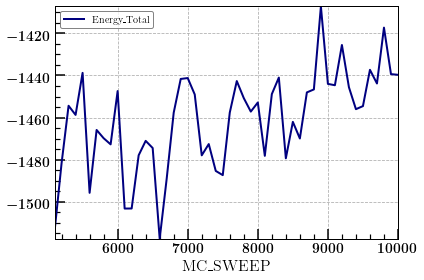

In [77]:
df_pd.plot(x="MC_SWEEP", y="Energy_Total")